In [569]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt
from collections import Counter

In [555]:
df = pd.read_csv('../../data/patches/lp_residue_all.csv')
df2 = pd.read_csv('../../data/processed_data/csv/global_seq_features_data.csv')
df3 = pd.read_csv('../../data/processed_data/csv/netsurp2_data.csv') 

In [556]:
df_merge = df3.merge(df[df['rank'] == 1]).merge(df2)

In [572]:
Counter(df[df['rank'] == 1]['residues'].sum()).most_common(20)

[('L', 75916),
 ('A', 64382),
 ('V', 51971),
 ('I', 42419),
 ('F', 34313),
 ('Y', 31703),
 ('M', 14040),
 ('W', 12429),
 ('C', 9824)]

In [557]:
training_columns = [ 'length', 'entropy',
       'hydr_count', 'polar_count', 'burried',
       'gravy', 'molecular_weight', 'aromaticity', 'instability_index',
       'isoelectric_point', 'A', 'C', 'D', 'E', 'F',
       'G', 'H', 'I', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'V', 'W',
       'Y']
nsp2 = ['rhsa_netsurfp2','thsa_netsurfp2','tasa_netsurfp2','q3_H','q3_E','q3_C']
training_columns_nsp2 = training_columns + nsp2
length = ['length']

In [558]:
X = df_merge[training_columns_nsp2]
y = df_merge['size']

In [559]:
len(y)

4449

In [536]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [537]:
xg_reg = xgb.XGBRegressor()

In [538]:
xg_reg.fit(X_train,y_train)

/home/jan/.conda/envs/bio/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:33:20] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1566327313563/work/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [539]:
xg_reg.score(X_test,y_test)

0.8204180686429093

In [540]:
def perc_corr(y_test, pred, x):
        error = abs(y_test-pred)
        y = [sum(error/y_test < i)/len(error) for i in x]
        return(y)

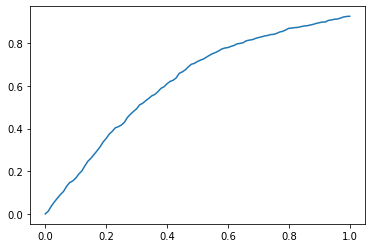

In [541]:
step = 100
x = [x/step for x in range(step+1)]
perc = perc_corr(y_test, xg_reg.predict(X_test), x)
plt.plot(x,perc)

In [523]:
def plot_curve(y_test, pred_dict, step, xlab, ylab, title):
        x = [x/step for x in range(step+1)]
        corr_dict = {pred:perc_corr(y_test, pred_dict[pred], x) for pred in pred_dict}

        plt.figure(figsize=(12,8))

        for corr in corr_dict:
            plt.plot(x,corr_dict[corr], label=corr)

        plt.xlabel(xlab)
        plt.ylabel(ylab)
        plt.title(title)
        plt.legend()
        plt.tight_layout()
        plt.show()